In [2]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pev2 = pd.read_csv('properties/properati-AR-2017-01-01-properties-sell.csv')
pev3 = pd.read_csv('properties/properati-AR-2016-07-01-properties-sell.csv')
pev4 = pd.read_csv('properties/properati-AR-2016-03-01-properties-sell-six_months.csv')
pev5 = pd.read_csv('properties/properati-AR-2014-12-01-properties-sell.csv')
pev6 = pd.read_csv('properties/properati-AR-2013-12-01-properties-sell.csv')
pev7 = pd.read_csv('properties/properati-AR-2015-12-01-properties-sell.csv')

/home/nicolas/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#389594 entries
pevconc = pd.concat([pev2,pev3]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev4]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev5]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev6]).drop_duplicates().reset_index(drop=True)
pev = pd.concat([pevconc, pev7]).drop_duplicates().reset_index(drop=True)
pev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389594 entries, 0 to 389593
Data columns (total 29 columns):
country_name                  131146 non-null object
created_on                    389594 non-null object
currency                      321983 non-null object
description                   255081 non-null object
expenses                      21657 non-null object
extra                         123943 non-null object
floor                         55013 non-null float64
geonames_id                   328381 non-null float64
id                            131146 non-null object
image_thumbnail               380067 non-null object
lat                           315425 non-null float64
lat-lon                       315425 non-null object
lon                           315420 non-null float64
operation                     389594 non-null object
place_name                    389563 non-null object
place_with_parent_names       389594 non-null object
price                         329113 no

In [5]:
pev['description'].values[0]
#pev['description'].values[1]
#pev['description'].values[2]
#pev['description'].values[3]
#pev['description'].values[4]



'Corredor Responsable: Martin Eguiazu - CCI Mat. N\xc2\xba 0179Contacto: CPN Maria Cecilia Iba\xc3\xb1ez - MLS ID # 420451015-165Excelente propiedad de tres dormitorios, living comedor, cocina, patio, garaje semi abierto y quincho. Cuenta con dos ingresos, uno principal al frente que da al living y el otro por el garaje. Sus detalles constructivos son muy buenos; paredes de ladrillos comunes con aberturas de aluminio, techo de cinc pintado, pisos de cer\xc3\xa1micos, cielorraso de yeso, revestimientos interiores de con revoque fino pintado y muy buena distribuci\xc3\xb3n y funcionalidad. Muy buena distribuci\xc3\xb3n e iluminaci\xc3\xb3n y en un punto estrat\xc3\xa9gico de la ciudad y con entorno socioecon\xc3\xb3mico muy bueno. Cuenta con todos los servicios'

## Evalúo la relación entre el precio promedio de viviendas por barrio (de Capital Federal) con y sin cochera

In [98]:
pev.dropna(subset=['property_type','price_usd_per_m2', 'place_name'], inplace=True)
pev_viviendas = pev.loc[(~pev.property_type.str.contains('store')),['description','property_type', \
                    'price_usd_per_m2', 'state_name', 'place_name']]
#pev_viviendas.head(10)
pev_viviendas.dropna(subset=['description', 'price_usd_per_m2', 'state_name'])
pev_viviendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199143 entries, 12 to 389003
Data columns (total 5 columns):
description         129058 non-null object
property_type       199143 non-null object
price_usd_per_m2    199143 non-null float64
state_name          69837 non-null object
place_name          199143 non-null object
dtypes: float64(1), object(4)
memory usage: 9.1+ MB


In [166]:
pev_viviendas_cochera = pev_viviendas.loc[pev_viviendas.description.str.contains('garaje|garage|garagge|\
            cochera|estacionamiento', case=False) & (pev_viviendas.state_name.str.contains('Capital Federal')),\
            ['price_usd_per_m2', 'place_name']].drop_duplicates().reset_index(drop=True)
#pev_viviendas_cochera.iloc[:10,0]
pev_viviendas_cochera.head(10)

,price_usd_per_m2,place_name
0,2277.777778,Monserrat
1,2678.571429,Monserrat
2,2642.857143,Monserrat
3,770.666667,Boedo
4,535.226652,Capital Federal
5,524.553571,Capital Federal
6,2042.483660,Palermo Soho
7,2897.810811,Belgrano
8,573.033708,Capital Federal
9,1449.704142,Belgrano


In [167]:
pev_viviendas_sin_cochera = pev_viviendas.loc[(pev_viviendas.description.str.contains('garaje|cochera|garage|\
    garagge|estacionamiento')==False) & (pev_viviendas.state_name.str.contains('Capital Federal')),\
    ['description', 'price_usd_per_m2', 'place_name']].drop_duplicates().reset_index(drop=True)
#pev_viviendas_sin_cochera.iloc[1,0]
pev_viviendas_sin_cochera.head(10)

,description,price_usd_per_m2,place_name
0,Venta de Departamento en edificio 3 AMBIENTES ...,2031.250000,Flores
1,VENTA DEPARTAMENTO 3 AMBIENTES EN PUERTO MADER...,7000.000000,Puerto Madero
2,DEPARTAMENTO CON EXCELENTES DETALLES DE TERMI...,2981.132075,Belgrano
3,Venta de Departamento MONOAMBIENTE en Caballit...,1295.081967,Caballito
4,Venta de Departamento MONOAMBIENTE en Caballit...,2075.757576,Caballito
5,APTO CRÉDITO!!!!Venta de Departamento 2 AMBIEN...,2037.735849,Villa Luro
6,"VENTA IMPERDIBLE 5 AMBIENTES MAS DEPENDENCIA,...",2575.268817,Palermo
7,"VENTA IMPERDIBLE 4 AMBIENTES MAS DEPENDENCIA, ...",2575.268817,Palermo
8,A Estrenar - Excelente Edificio Ideal Estudio ...,1692.307692,Palermo
9,VENTA DEPARTAMENTO DE 3 AMBIENTES APTO PROFESI...,1795.454545,Congreso


In [168]:
print(len(pev_viviendas_cochera))
print(len(pev_viviendas_sin_cochera))

810
15474


In [169]:
pev_viviendas_cochera_promedio_por_barrio = pev_viviendas_cochera.loc[:,['price_usd_per_m2', 'place_name']].groupby('place_name').\
        agg([np.mean,np.size])
pev_viviendas_cochera_promedio_por_barrio.columns=['promedio_con', 'tamanio_con']
pev_viviendas_cochera_promedio_por_barrio = pev_viviendas_cochera_promedio_por_barrio\
    .loc[pev_viviendas_cochera_promedio_por_barrio.tamanio_con >5 ,:]
pev_viviendas_cochera_promedio_por_barrio

,promedio_con,tamanio_con
place_name,,
Almagro,1563.376916,11.0
Barracas,1357.948450,8.0
Barrio Norte,3666.856396,7.0
Belgrano,2949.041428,69.0
Boedo,1019.548106,7.0
Caballito,1922.972665,30.0
Capital Federal,797.309659,139.0
Chacarita,1563.443473,19.0
Colegiales,2000.793233,15.0


In [170]:
pev_viviendas_sin_cochera_promedio_por_barrio = pev_viviendas_sin_cochera.loc[:,['price_usd_per_m2', 'place_name']].groupby('place_name').\
        agg([np.mean,np.size])
pev_viviendas_sin_cochera_promedio_por_barrio.columns=['promedio_sin', 'tamanio_sin']
pev_viviendas_sin_cochera_promedio_por_barrio = pev_viviendas_sin_cochera_promedio_por_barrio\
    .loc[pev_viviendas_sin_cochera_promedio_por_barrio.tamanio_sin >5 ,:]

pev_viviendas_sin_cochera_promedio_por_barrio.head(10)

,promedio_sin,tamanio_sin
place_name,,
Abasto,2386.362488,60.0
Agronomía,2130.867175,42.0
Almagro,2090.800436,747.0
Balvanera,1763.776126,474.0
Barracas,1745.080611,267.0
Barrio Norte,2668.542910,843.0
Belgrano,2905.620770,1181.0
Boca,1439.700147,136.0
Boedo,1151.016087,855.0


In [171]:
pev_join = pev_viviendas_cochera_promedio_por_barrio.join(pev_viviendas_sin_cochera_promedio_por_barrio,\
            on=None, how='inner')
#df.drop(['Cochice', 'Pima'])
pev_join = pev_join.drop(['Capital Federal'])
pev_join.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, Almagro to Villa del Parque
Data columns (total 4 columns):
promedio_con    37 non-null float64
tamanio_con     37 non-null float64
promedio_sin    37 non-null float64
tamanio_sin     37 non-null float64
dtypes: float64(4)
memory usage: 1.4+ KB


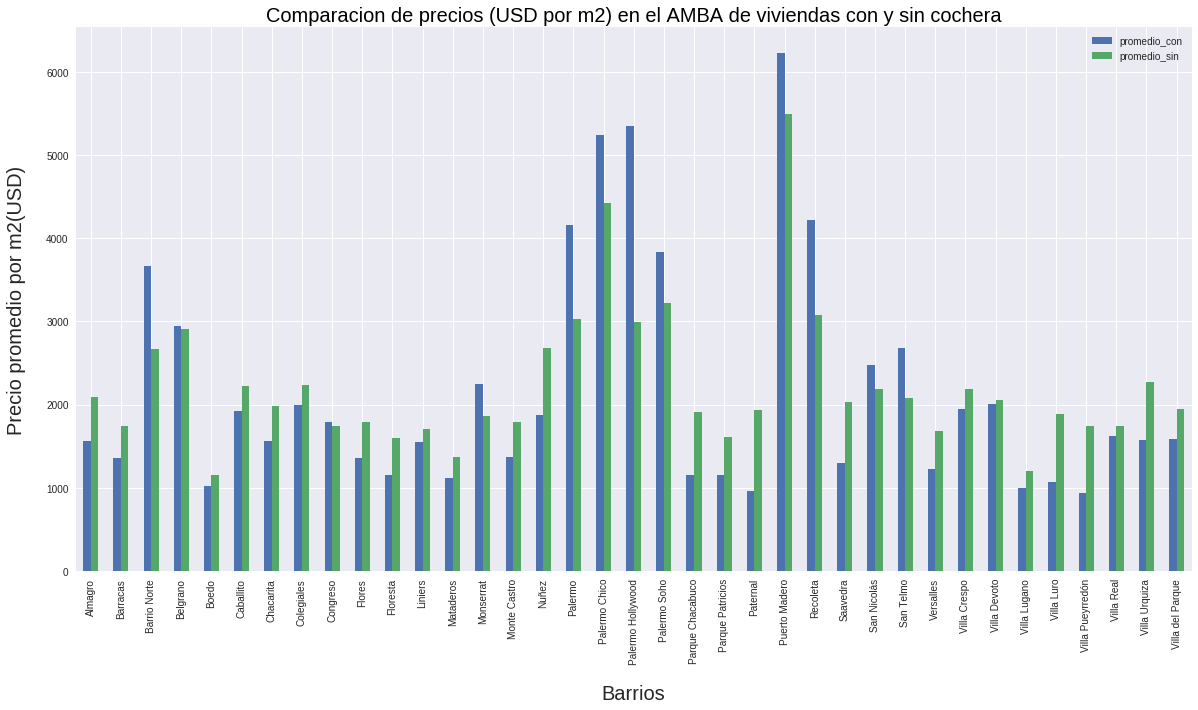

In [172]:
f = plt.figure()
ax = pev_join.loc[:,['promedio_con', 'promedio_sin']].plot(kind='bar',figsize=(20,10), ax=f.gca())
ax.set_title('Comparacion de precios (USD por m2) en el AMBA de viviendas con y sin cochera',\
             color='black',size=20.0)
ax.set_xlabel('Barrios',size=20.0,labelpad=20.0);
ax.set_ylabel('Precio promedio por m2(USD)', size=20.0,labelpad=20.0)
plt.show()

## Esto se puede seguir de la siguiente forma: mismo análisis para, por ejemplo, G.B.A (por zona Norte, Sur y Oeste). Se puede hacer el mismo análisis para las viviendas con parrilla y/o pileta

In [173]:
pev_viviendas_cochera_gba = pev_viviendas.loc[pev_viviendas.description.str.contains('garaje|garage|garagge|\
            cochera|estacionamiento', case=False) & (pev_viviendas.state_name.str.contains('G.B.A')),\
            ['price_usd_per_m2', 'place_name']].drop_duplicates().reset_index(drop=True)
#pev_viviendas_cochera.iloc[:10,0]
pev_viviendas_cochera_gba.head(10)

,price_usd_per_m2,place_name
0,659.090909,San Justo
1,867.647059,Caseros
2,1470.588235,Tigre
3,287.500000,Maschwitz
4,1012.145749,Martínez
5,1545.454545,Nordelta
6,1657.894737,La Lucila
7,355.263158,Caseros
8,1155.913978,Castelar
9,644.341801,Caseros


In [165]:
pev_viviendas_sin_cochera_gba = pev_viviendas.loc[(pev_viviendas.description.str.contains('garaje|cochera|garage|\
    garagge|estacionamiento')==False) & (pev_viviendas.state_name.str.contains('G.B.A')),\
    ['description', 'price_usd_per_m2', 'place_name']].drop_duplicates().reset_index(drop=True)
#pev_viviendas_sin_cochera.iloc[1,0]
pev_viviendas_sin_cochera_gba.head(10)

,description,price_usd_per_m2,place_name
0,Es un departamento SEMIPISO de dos ambientes a...,1576.271186,San Justo
1,Es un departamento SEMIPISO de dos ambientes a...,1576.271186,San Justo
2,Es un departamento SEMIPISO de dos ambientes a...,1690.909091,San Justo
3,Es un departamento SEMIPISO de dos ambientes a...,1690.909091,San Justo
4,Es un departamento de tres ambientes a estrena...,1304.347826,San Justo
5,VENTA DE CASA EN UNA PLANTA. ESTILO AMERICANO....,1100.000000,Caseros
6,VENTA DE DEPARTAMENTO TIPO CASA EN CASEROS. 3 ...,867.647059,Caseros
7,Venta de Departamento en edificio 3 AMBIENTES...,2142.857143,Caseros
8,Venta de Casa 4 AMBIENTES en Valentín AlsinaSe...,538.461538,Valentín Alsina
9,Venta de Casa 4 AMBIENTES en LanúsIdeal para e...,578.034682,Lanús


In [174]:
print(len(pev_viviendas_cochera_gba))
print(len(pev_viviendas_sin_cochera_gba))

4316
21893


In [181]:
pev_viviendas_cochera_promedio_por_barrio_gba = pev_viviendas_cochera_gba.loc[:,['price_usd_per_m2', 'place_name']].groupby('place_name').\
        agg([np.mean,np.size])
pev_viviendas_cochera_promedio_por_barrio_gba.columns=['promedio_con', 'tamanio_con']
pev_viviendas_cochera_promedio_por_barrio_gba = pev_viviendas_cochera_promedio_por_barrio_gba\
    .loc[pev_viviendas_cochera_promedio_por_barrio_gba.tamanio_con >5 ,:]
pev_viviendas_cochera_promedio_por_barrio_gba.head(10)

,promedio_con,tamanio_con
place_name,,
Acassuso,1431.919276,89.0
Adrogué,1257.372057,45.0
Avellaneda,1043.421539,7.0
Banfield,1059.014487,40.0
Barrio Los Lagos,2099.025298,6.0
Barrio San Francisco,1529.030510,7.0
Barrio Santa Teresa,1454.787591,7.0
Beccar,1249.616206,67.0
Bella Vista,687.991369,10.0


In [180]:
pev_viviendas_sin_cochera_promedio_por_barrio_gba = pev_viviendas_sin_cochera_gba.loc[:,['price_usd_per_m2', 'place_name']].groupby('place_name').\
        agg([np.mean,np.size])
pev_viviendas_sin_cochera_promedio_por_barrio_gba.columns=['promedio_sin', 'tamanio_sin']
pev_viviendas_sin_cochera_promedio_por_barrio_gba = pev_viviendas_sin_cochera_promedio_por_barrio_gba\
    .loc[pev_viviendas_sin_cochera_promedio_por_barrio_gba.tamanio_sin >5 ,:]

pev_viviendas_sin_cochera_promedio_por_barrio_gba.head(10)

,promedio_sin,tamanio_sin
place_name,,
Country Maschwitz Club,1208.254380,9.0
Abril Club de Campo,1678.393364,13.0
Acacias Blancas,1074.965548,28.0
Acassuso,1801.798783,187.0
Adrogué,1637.877190,133.0
Albanueva Barrio Cerrado,2005.418974,11.0
Altos de Hudson II,1408.466189,6.0
Avellaneda,1326.918045,65.0
Banfield,1462.400406,102.0


In [182]:
# Esto no se puede graficar y comparar. habría que separar en zonas

pev_join_gba = pev_viviendas_cochera_promedio_por_barrio_gba.join(pev_viviendas_sin_cochera_promedio_por_barrio_gba,\
            on=None, how='inner')
#pev_join = pev_join.drop(['Capital Federal'])
pev_join_gba.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, Acassuso to Virrey del Pino
Data columns (total 4 columns):
promedio_con    109 non-null float64
tamanio_con     109 non-null float64
promedio_sin    109 non-null float64
tamanio_sin     109 non-null float64
dtypes: float64(4)
memory usage: 4.3+ KB
